In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\manan\OneDrive\Desktop\Brain-Tumor-Detection\Dataset\Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 4571 files belonging to 4 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\manan\OneDrive\Desktop\Brain-Tumor-Detection\Dataset\Valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 1141 files belonging to 4 classes.


In [3]:
cnn = tf.keras.models.Sequential()

In [4]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\manan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))   

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [17]:
cnn.compile(optimizer=Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,496,688 (28.60 MB)

 Trainable params: 7,496,688 (28.60 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


143/143 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.4536 - loss: 1.2397 - val_accuracy: 0.7791 - val_loss: 0.5595
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 413s 3s/step - accuracy: 0.7312 - loss: 0.6314 - val_accuracy: 0.8037 - val_loss: 0.4661
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 370s 3s/step - accuracy: 0.8336 - loss: 0.4410 - val_accuracy: 0.8493 - val_loss: 0.4316
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.8758 - loss: 0.3306 - val_accuracy: 0.9176 - val_loss: 0.2518
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.9101 - loss: 0.2472 - val_accuracy: 0.9018 - val_loss: 0.2899
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9327 - loss: 0.1840 - val_accuracy: 0.9246 - val_loss: 0.2255
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.9601 - loss: 0.1199 - val_accuracy: 0.9308 - val_loss: 0.2220
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9707 - loss: 0.0873 - val_accuracy: 0.931

In [20]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

143/143 ━━━━━━━━━━━━━━━━━━━━ 105s 732ms/step - accuracy: 0.9820 - loss: 0.0506
Training accuracy: 0.9831546545028687


In [21]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.9363 - loss: 0.2219
Validation accuracy: 0.9263803958892822


In [22]:
cnn.save('Brain_Tumor_model.keras')

In [23]:
training_history.history

{'accuracy': [0.5871800184249878,
  0.7656967639923096,
  0.8448917269706726,
  0.8912710547447205,
  0.9186173677444458,
  0.9453073740005493,
  0.9658718109130859,
  0.9741851091384888,
  0.9789980053901672,
  0.9792168140411377],
 'loss': [0.9540310502052307,
  0.567287266254425,
  0.4059199094772339,
  0.2909976840019226,
  0.22431954741477966,
  0.14761753380298615,
  0.09939020872116089,
  0.07526209950447083,
  0.058518193662166595,
  0.060307640582323074],
 'val_accuracy': [0.7791411280632019,
  0.803680956363678,
  0.8492550253868103,
  0.9176161289215088,
  0.9018405079841614,
  0.9246275424957275,
  0.9307624697685242,
  0.9316388964653015,
  0.9333917498588562,
  0.9263803958892822],
 'val_loss': [0.5594602227210999,
  0.4661065638065338,
  0.4316199719905853,
  0.2517813742160797,
  0.2898794710636139,
  0.22553661465644836,
  0.22201228141784668,
  0.20589779317378998,
  0.23115353286266327,
  0.25858616828918457]}

In [24]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


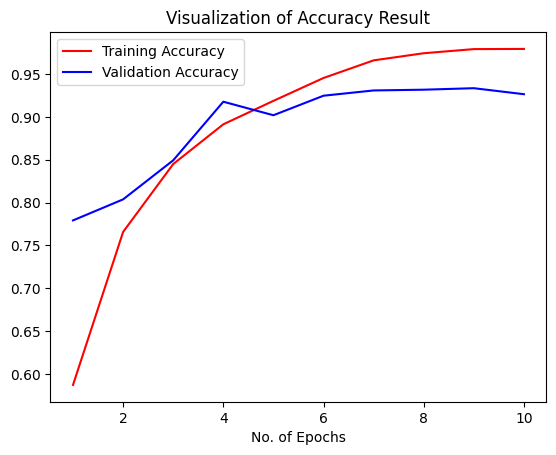

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [27]:
class_name = validation_set.class_names

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\manan\OneDrive\Desktop\Brain-Tumor-Detection\Dataset\Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1311 files belonging to 4 classes.


In [29]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1311/1311 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step


In [30]:
true_categories = []
for images, labels in test_set:
    true_categories.append(labels)

true_categories = np.concatenate(true_categories, axis=0)

In [31]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(1311,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [32]:
predicted_categories

<tf.Tensor: shape=(1311,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [33]:
cm = confusion_matrix(Y_true,predicted_categories)
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

      Glioma       0.90      0.92      0.91       300
  Meningioma       0.95      0.75      0.84       306
      Normal       0.95      1.00      0.97       405
   Pituitary       0.89      1.00      0.94       300

    accuracy                           0.92      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.93      0.92      0.92      1311



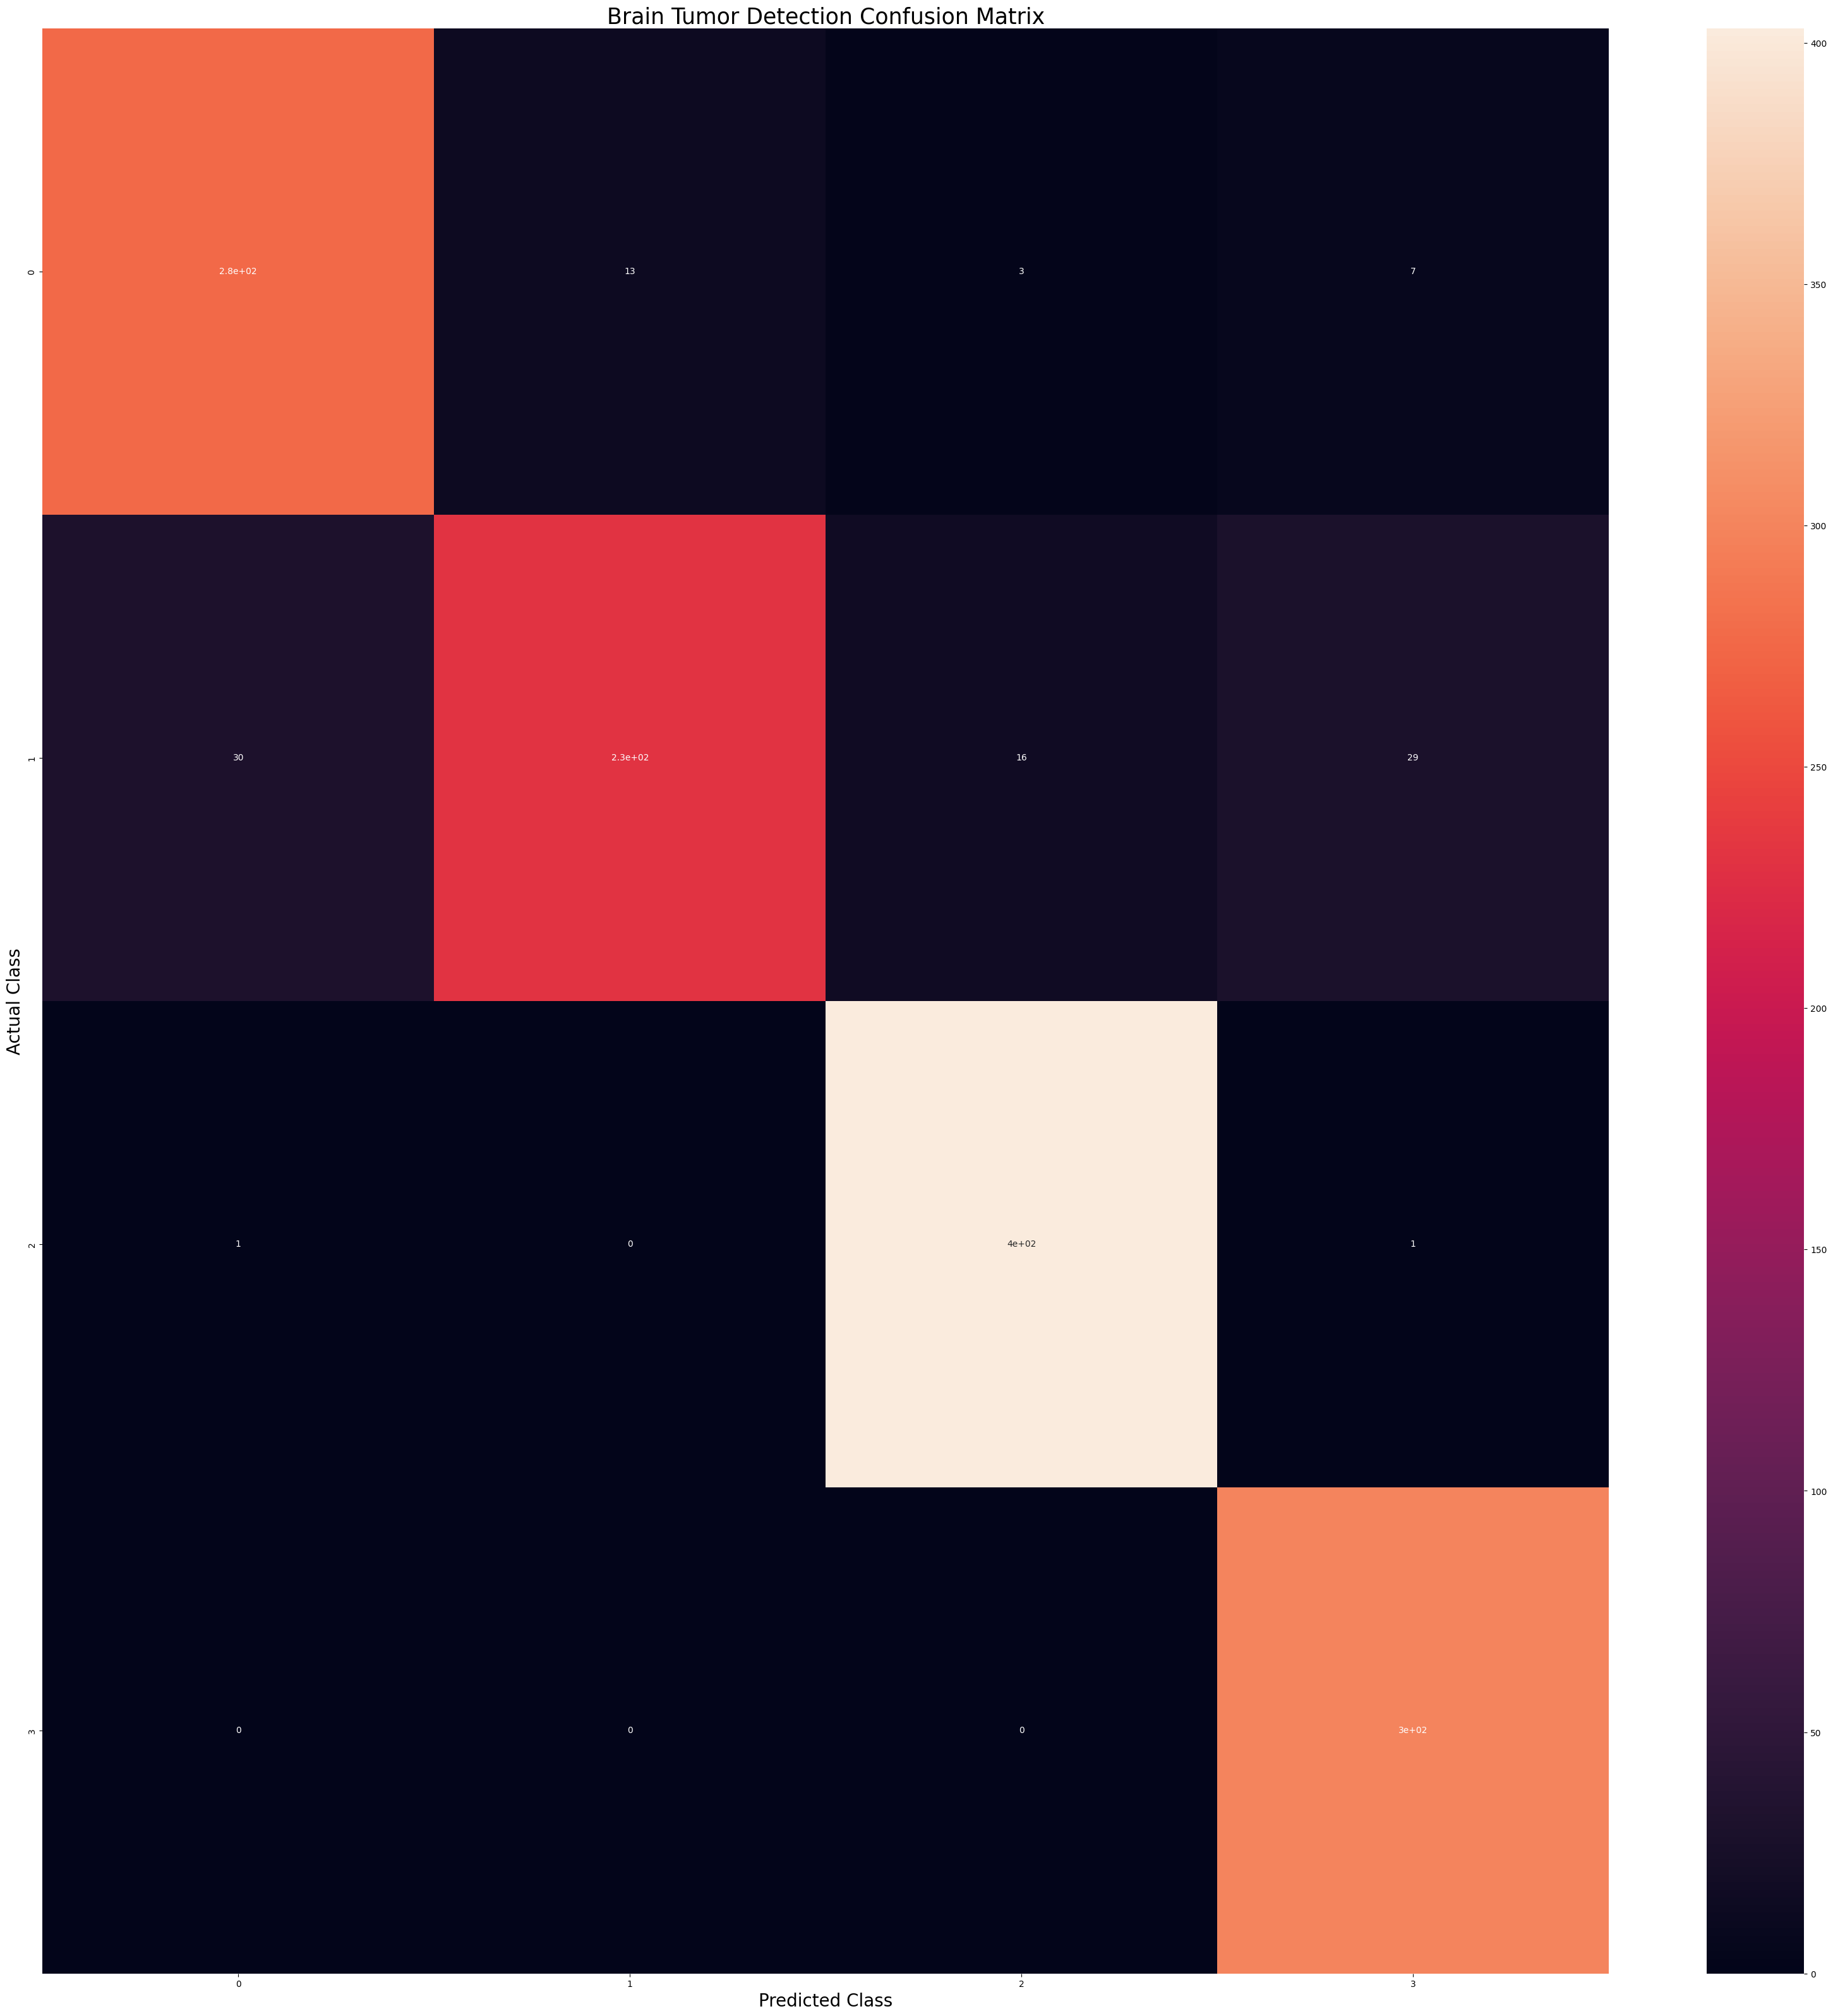

In [34]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Brain Tumor Detection Confusion Matrix',fontsize = 25)
plt.show()